In [124]:
import numpy as np
from PIL import Image
import scipy.linalg as la
import os

In [176]:
os.getcwd()
os.listdir()

with Image.open("/content/ellascat.png") as f:
  w = f.width
  h = f.height
  rarr =[[0]*h for i in range(w)]
  garr = [[0]*h for i in range(w)]
  barr = [[0]*h for i in range(w)]
  for i in range(w):
    for j in range(h):
      pixels = f.getpixel((i,j))
      rarr[i][j] = pixels[0]
      garr[i][j] = pixels[1]
      barr[i][j] = pixels[2]

In [177]:
def removeVals(arrP,arrSigma,arrQT,k):
  arrPKR = arrP[:,0:k] #Array P K removed
  arrSigmaKR = arrSigma[0:k]
  arrQTKR = (arrQT.transpose()[:,0:k]).transpose()
  return arrPKR, arrSigmaKR,arrQTKR

In [201]:
def recomposeImage(arrR,arrG,arrB):
  ni = Image.new('RGB',(w,h))
  for i in range(len(arrR)):
    for j in range(len(arrR[0])):
      ni.putpixel((i,j),(arrR[i][j],arrG[i][j],arrB[i][j]))
  return ni

In [199]:
def compress(arrR,arrG,arrB,k):
  rArrMatr = np.asmatrix(arrR)
  svdRarrP,svdRarrSigma, svdRarrQT = np.linalg.svd(rArrMatr)
  
  gArrMatr = np.asmatrix(garr)
  svdGarrP,svdGarrSigma, svdGarrQT = np.linalg.svd(gArrMatr)

  bArrMatr = np.asmatrix(arrB)
  svdBarrP,svdBarrSigma, svdBarrQT = np.linalg.svd(bArrMatr)

  svdRarrPN,svdRarrSigmaN, svdRarrQTN = removeVals(svdRarrP,svdRarrSigma, svdRarrQT,k)
  svdGarrPN,svdGarrSigmaN, svdGarrQTN = removeVals(svdGarrP,svdGarrSigma, svdGarrQT,k)
  svdBarrPN,svdBarrSigmaN, svdBarrQTN = removeVals(svdBarrP,svdBarrSigma, svdBarrQT,k)

  nRarr = (svdRarrPN@ la.diagsvd(svdRarrSigmaN, svdRarrPN.shape[1],svdRarrQTN.shape[0]) @ svdRarrQTN).astype(int).tolist()
  nGarr = (svdGarrPN@ la.diagsvd(svdGarrSigmaN, svdGarrPN.shape[1],svdGarrQTN.shape[0]) @ svdGarrQTN).astype(int).tolist()
  nBarr = (svdBarrPN@ la.diagsvd(svdBarrSigmaN, svdBarrPN.shape[1],svdBarrQTN.shape[0]) @ svdBarrQTN).astype(int).tolist()
  
  ni = recomposeImage(nRarr,nGarr,nBarr)
  ni.show()


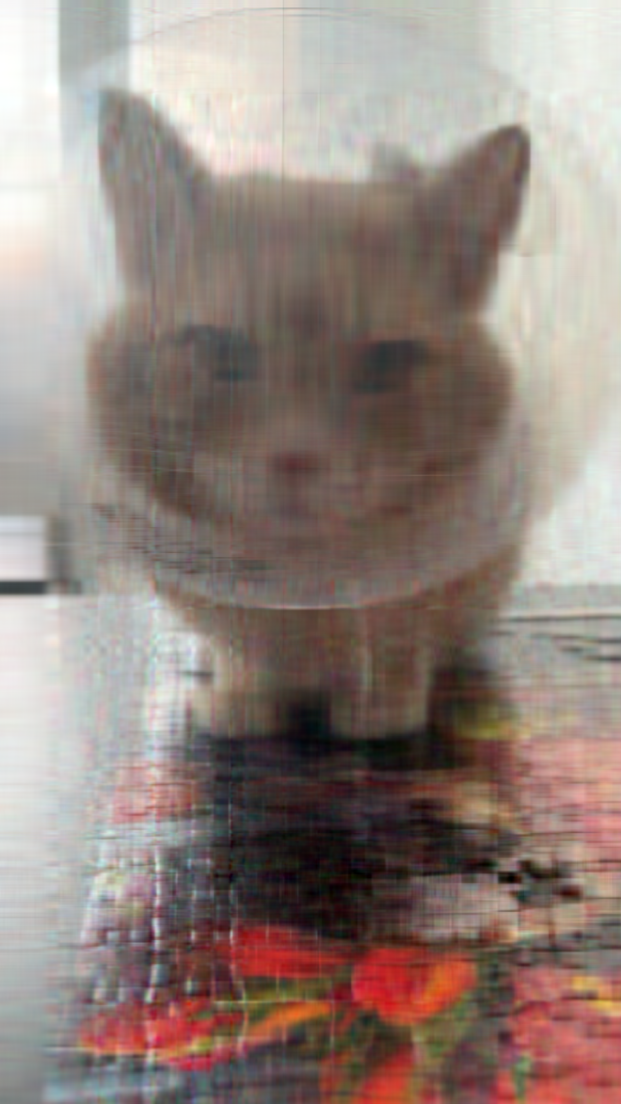

In [205]:
compress(rarr,garr,barr,20)

In [38]:
import os
import numpy as np
from PIL import Image
from scipy.linalg import svd

def compress_image(image_path, compression_rate):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.asarray(img)

    # Perform SVD decomposition
    U, s, Vt = svd(img_array)

    # Keep k largest singular values
    k = int(compression_rate * len(s))
    U_reduced = U[:, :k]
    s_reduced = np.diag(s[:k])
    Vt_reduced = Vt[:k, :]

    # Reconstruct the compressed image
    img_compressed = np.dot(U_reduced, np.dot(s_reduced, Vt_reduced))

    # Save the compressed image
    compressed_img = Image.fromarray(np.uint8(img_compressed))
    return compressed_img


def compress_images(folder_path, output_path, compression_rate):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    total_original_size = 0
    total_compressed_size = 0
    num_images = 0

    # Supported image file extensions
    valid_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"]

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        file_extension = os.path.splitext(img_name)[1].lower()

        if os.path.isfile(img_path) and file_extension in valid_extensions:
            # Compress image and save to output folder
            compressed_img = compress_image(img_path, compression_rate)
            compressed_img.save(os.path.join(output_path, img_name))

            # Calculate size of original and compressed images
            original_size = os.path.getsize(img_path)
            compressed_size = os.path.getsize(os.path.join(output_path, img_name))

            total_original_size += original_size
            total_compressed_size += compressed_size
            num_images += 1

    # Print average sizes pre and post compression
    avg_original_size = total_original_size / num_images
    avg_compressed_size = total_compressed_size / num_images
    print(f"Average original size: {avg_original_size:.2f} bytes")
    print(f"Average compressed size: {avg_compressed_size:.2f} bytes")

folder_path = '/Users/zain/Desktop/Matrix_Proj/src_imgs/'
comp_rate = 0.1  # Compression rate between 0 and 1
output_path = '/Users/zain/Desktop/Matrix_Proj/cmprsd_imgs'
compress_images(folder_path, output_path, comp_rate)

Average original size: 349243.00 bytes
Average compressed size: 132463.33 bytes
